# Voting classifiers

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [2]:
X,y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [4]:
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf',rnd_clf),('svc', svm_clf)],
    voting='hard'
)

In [5]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [6]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))

('LogisticRegression', 0.864)
('RandomForestClassifier', 0.872)
('SVC', 0.888)
('VotingClassifier', 0.896)


/Users/peilinjiang/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Bagging ensembles

Another approch is to use the same training algorithm for every predictor, but to train them on different random subsets of the training set. When sampling is performed with replacement, this method is called bagging. When sampling is performed without replacement, it is called pasting

In other words, both bagging and pasting allow training instance to be sampled several times across multiple predictors, but only bagging allows training instances to be sampled several times for the same predictor.

Each individual predictor has a higher bias than if it were trained on the original training set, but aggregation reduces both bias and variance. Generrally, the net result is that the ensemble has a similar bias but a lower variance than a single predictor trained on the original training set.

## Bagging and Pasting in Scikit-learn

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [8]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators = 500,
    max_samples = 100, bootstrap = True, n_jobs = -1, random_state=42
)

In [9]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [10]:
accuracy_score(y_pred, y_test)

0.904

In [11]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [12]:
y_pred = tree_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.856

Bootstrap introduces a bit more diversity in subsets that each predictor is trained on, so bagging ends up with slight higher bias than pasting, but this also means that predictors end up being less correlated so the.ensemble's variance is reduced

## Out-of-bagging Evaluation

In [13]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42),
                           n_estimators = 500, bootstrap= True, n_jobs =-1,
                            oob_score = True, max_samples =100
                           )

In [14]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [15]:
bag_clf.oob_score_

0.9253333333333333

In [16]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.92

# Random Forests

In [17]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators =500, max_samples = 1.0, bootstrap = True, n_jobs =-1, random_state=42
)

In [18]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)

In [21]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [22]:
y_pred_rf = rnd_clf.predict(X_test)

In [23]:
import numpy as np
from __future__ import division

In [24]:
np.sum(y_pred == y_pred_rf)/len(y_pred) # almost identical prediction

0.976

In [25]:
from sklearn.datasets import load_iris


In [26]:
iris = load_iris()

In [27]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [28]:
rnd_clf.fit(iris["data"], iris["target"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [29]:
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

('sepal length (cm)', 0.11249225099876374)
('sepal width (cm)', 0.023119288282510326)
('petal length (cm)', 0.44103046436395765)
('petal width (cm)', 0.4233579963547681)


In [30]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

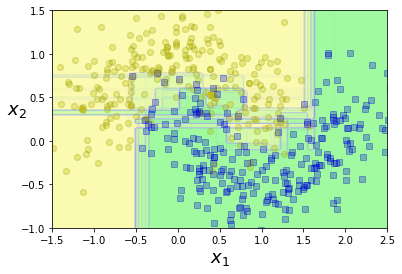

In [33]:
plt.figure(figsize=(6,4))

for i in range(15):
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=16, random_state=42+i)
    indices_with_replacement = np.random.randint(0, len(X_train), len(X_train))
    tree_clf.fit(X[indices_with_replacement], y[indices_with_replacement])
    plot_decision_boundary(tree_clf, X,y, axes=[-1.5, 2.5, -1, 1.5], alpha =0.02, contour=False)

Random forests are very hardy to get a quick understanding of what features actually matter, in particular if you need to perform feature selection

# Boosting

The general idea of most boosting method is to train predictors sequentailly, each trying to correct its predecessor.

## AdaBoost

One way for a new predictor to correct its predecessor is to pay a bit more attention to the training instance that the predecessor underfitted

In [34]:
from sklearn.ensemble import AdaBoostClassifier

In [35]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators = 200,
    algorithm = "SAMME.R", learning_rate=0.5, random_state =42
)

In [36]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=42)

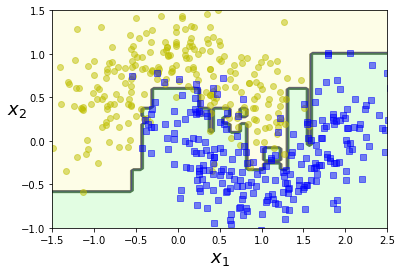

In [37]:
plot_decision_boundary(ada_clf, X, y)

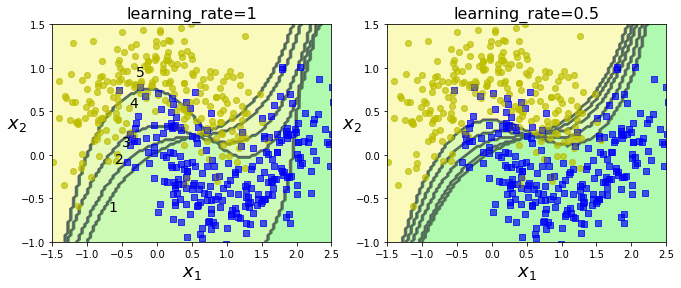

In [38]:
m = len(X_train)

plt.figure(figsize=(11,4))

for subplot, learning_rate in ((121,1), (122,0.5)):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="auto", random_state=42)
        svm_clf.fit(X_train,y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred!=y_train] *= (1+learning_rate)
        plot_decision_boundary(svm_clf, X,y, alpha=0.2)
        plt.title("learning_rate={}".format(learning_rate), fontsize=16)
    if subplot ==121:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)
plt.show()

In [39]:
list(m for m in dir(ada_clf) if not m.startswith("_") and m.endswith("_"))

['base_estimator_',
 'classes_',
 'estimator_errors_',
 'estimator_weights_',
 'estimators_',
 'feature_importances_',
 'n_classes_']

## Gradient Boosting

This method tries to fit the new predictor to the residual error made by the previous predictor.

The learning_rate hyperparameter scales the contribution of each tree. If you set it to a low value, such as 0.1, you will need more trees in the ensemble to fit the training set, but the predictions will usually generalize better.

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [42]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3,
                                learning_rate=1.0,
                                random_state=42)

In [43]:
gbrt.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [44]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200,
                                     learning_rate=0.1, random_state=42)

In [45]:
gbrt_slow.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

## Gradient Boosting with Early stopping

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [47]:
X_train, X_val, y_train, y_val = train_test_split(X,y,random_state= 49)

In [48]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)

In [49]:
gbrt.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=120, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [50]:
errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]

In [51]:
bst_n_estimator = np.argmin(errors)

In [52]:
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimator,
                                     random_state=42)

In [53]:
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=55, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [54]:
min_error = np.min(errors)

In [55]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)


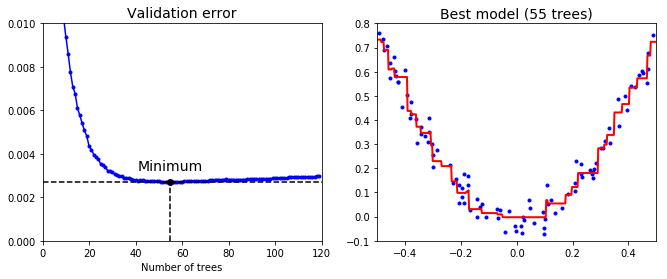

In [57]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimator, bst_n_estimator], [0, min_error], "k--")
plt.plot([0,120],[min_error, min_error], "k--")
plt.plot(bst_n_estimator, min_error, "ko")
plt.text(bst_n_estimator, min_error*1.2,"Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimator, fontsize=14)

plt.show()

In [58]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train,y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up +=1
        if error_going_up ==5:
            break

In [59]:
print(gbrt.n_estimators)

61


In [60]:
print("Minimum validation MSE:", min_val_error)

('Minimum validation MSE:', 0.002712853325235463)


## Using XGBoost

In [61]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

In [62]:
if xgboost is not None: 
    xgb_reg = xgboost.XGBRegressor(random_state=42)
    xgb_reg.fit(X_train,y_train)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    print("Validation MSE:", val_error)

('Validation MSE:', 0.0028512559726563943)


In [64]:
if xgboost is not None:
    xgb_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=2)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    print("Validation MSE:", val_error)

[0]	validation_0-rmse:0.286719
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:0.258221
[2]	validation_0-rmse:0.232634
[3]	validation_0-rmse:0.210526
[4]	validation_0-rmse:0.190232
[5]	validation_0-rmse:0.172196
[6]	validation_0-rmse:0.156394
[7]	validation_0-rmse:0.142241
[8]	validation_0-rmse:0.129789
[9]	validation_0-rmse:0.118752
[10]	validation_0-rmse:0.108388
[11]	validation_0-rmse:0.100155
[12]	validation_0-rmse:0.09208
[13]	validation_0-rmse:0.084791
[14]	validation_0-rmse:0.078699
[15]	validation_0-rmse:0.073248
[16]	validation_0-rmse:0.069391
[17]	validation_0-rmse:0.066277
[18]	validation_0-rmse:0.063458
[19]	validation_0-rmse:0.060326
[20]	validation_0-rmse:0.0578
[21]	validation_0-rmse:0.055643
[22]	validation_0-rmse:0.053943
[23]	validation_0-rmse:0.053138
[24]	validation_0-rmse:0.052415
[25]	validation_0-rmse:0.051821
[26]	validation_0-rmse:0.051226
[27]	validation_0-rmse:0.051135
[28]	validation_0-rmse:0.05091
[29]	validation_0-rmse

# Excercise

1. if you have trained five different models on the exact same training data, and they all achieve 95% precision, is there any chance that you can combine these models to get better results?

  you can try combining them into a voting ensemble, which will often give you even better results. It works better if the models are very differnt. It is even better if they are trained on different training instance, but if not it will still work as long as the models are very different

2. what is the difference between hard and soft voting classifiers?

A hard voting classifier just counts the votes of each classifier in the ensemble and picks the class that gets the most votes. A soft voting classifier compute the average estimated class probability for each class and picks the class with the highest probability. This gives high-confidence votes more weight and often performs better, but it works only if every classifier is able to estimate class probabilities(e.g., for the SVM classifiers in Scikit-learn you must set probability = True)

3. Is it possible to speed up training of a bagging ensemble by distributing it across multiple servers? What about pasting ensembles, boosting ensembles, random forests, or stacking ensembles

It is quite possible to speed up training of a bagging ensemble by distributing it across multiple servers, since each predictor in the ensemble is independent of the others. The same goes for pasting ensembles and Random Forests, for the same reason. However, each predictor in a boosting ensemble is built based on the previous predictor, so training is necessarily sequentail, and you will not gain anything by distriubuing trianing across multiple servers. Regarding stacking ensembles, all the predictors in a givern layer are independent of each other, so they can be trainied in parallel on multiple serverx. However, the predictors in one layer can only be trainined after the predictors in the previous layer have all been trained.

4. What is the benefit of out-of-bag evaluation?

With out-of-bag evaluation, each predictor in a bagging ensemble is evaluated using instance that it was not trainined on. This makes it possible to have a fairly unbiased evaluation of the ensemble without the need for an addtional validation set. Thus, you have more instances avalibale of training, and your ensemble can perform slightly better.

5. What make Extra-Tree more random than regular Random Forest? How can this extra randomness help? Are Extra- Tree slower or faster than regular Random Forest?

when you are growing a tree in a Random forest, only a random subset of the feature is considered for splitting at each node. This is true as well for Extra-Tree, but they go one step further: rather than searching for the best possible thresholds, like regular Decision tree do, they use random thresholds for each feature. This extra randomness acts like a form of regularization: if a Random forest overfits the training data, Extra-Tree might perfom better. Moreover, since Extra-Tree don't search for the best possible thresholds, they are much faster to train than Random Forests. However, they are neither faster nor slower than Random Forests when making predictions

6. If your AdaBoost ensemble underfits the training data, what hyperparameters should you tweak and how? 

If your AdaBoost ensemble underfits the training data, you can try increasing the number of estimators or reducing the regularization hyperparameters of the base estimator. You may also try slightly increasing the learning rate.

7. If your Gradient Boosting ensemble overfits the training set, should you increase or decrease the learning rate?

you should try decreasing the learning rate. You could also use early stopping to find the right number of predictors

8. Voting Classifier